In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data exploration

In [2]:
df = pd.read_csv("ds_salaries.csv")

#### Quic look no data

In [3]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [8]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [9]:
df.isna().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

I'm droping Unnamed column we don't need it

In [15]:
df = df.drop(columns="Unnamed: 0")

In [16]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


#### Categorical Columns

##### Sallary in time

In [8]:
df["work_year"].count()

607

In [10]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [43]:
df_salary = df[["work_year", "salary_in_usd"]].groupby("work_year").mean()
df_salary_job_title =df[["job_title", "salary_in_usd"]].groupby("job_title").mean()

##### Mean salary in every year

In [39]:
df_salary

,salary_in_usd
work_year,
2020,95813.000000
2021,99853.792627
2022,124522.006289


Job title with max mean

In [86]:
df_salary_job_title.sort_values(by="salary_in_usd", ascending=False).head()

,salary_in_usd
job_title,
Data Analytics Lead,405000.000000
Principal Data Engineer,328333.333333
Financial Data Analyst,275000.000000
Principal Data Scientist,215242.428571
Director of Data Science,195074.000000


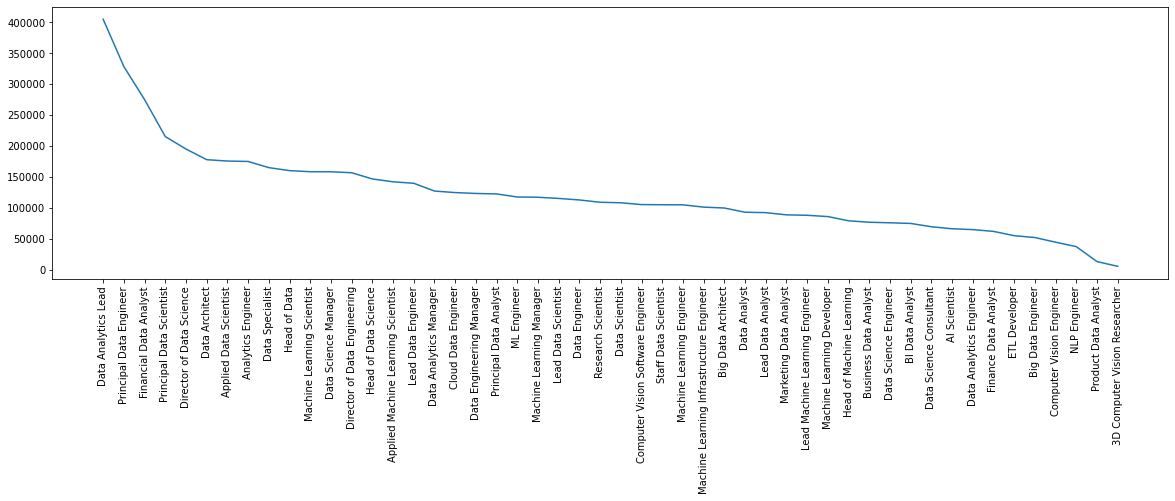

In [94]:
plt.figure(figsize=(20,5))
plt.plot(df_salary_job_title.sort_values(by="salary_in_usd", ascending=False))
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.plot(df_salary_job_title.sort_values(by="salary_in_usd", ascending=False))

##### Job title

In [95]:
qty_of_jobs_title = df["job_title"].value_counts().size

print(f"Quantity of jobs: {qty_of_jobs_title}")

Quantity of jobs: 50


In [96]:
df["job_title"].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

To my analys I'm taking 3 jobs title with the most records

In [97]:
df["job_title"].value_counts()[:3]

Data Scientist    143
Data Engineer     132
Data Analyst       97
Name: job_title, dtype: int64

In [142]:
mean_data_scientist = df["salary_in_usd"][(df["job_title"] == "Data Scientist")].mean()
max_data_scientist = df["salary_in_usd"][(df["job_title"] == "Data Scientist")].max()
min_data_scientist = df["salary_in_usd"][(df["job_title"] == "Data Scientist")].min()

mean_data_engineer = df["salary_in_usd"][(df["job_title"] == "Data Engineer")].mean()
max_data_engineer = df["salary_in_usd"][(df["job_title"] == "Data Engineer")].max()
min_data_engineer = df["salary_in_usd"][(df["job_title"] == "Data Engineer")].min()

mean_data_analyst = df["salary_in_usd"][(df["job_title"] == "Data Analyst")].mean()
max_data_analyst = df["salary_in_usd"][(df["job_title"] == "Data Analyst")].max()
min_data_analyst = df["salary_in_usd"][(df["job_title"] == "Data Analyst")].min()

print(f"Data scientist salary MEAN: {mean_data_scientist}n\
    MAX: {max_data_scientist}n\
    MIN: {min_data_scientist}")

print(f"Data enrineer salary MEAN: {mean_data_engineer}n\
    MAX: {max_data_engineer}n\
    MIN: {min_data_engineer}")

print(f"Data analyst salary MEAN: {mean_data_analyst}n\
    MAX: {max_data_analyst}n\
    MIN: {min_data_analyst}")

Data scientist salary MEAN: 108187.83216783217n    MAX: 412000n    MIN: 2859
Data enrineer salary MEAN: 112725.0n    MAX: 324000n    MIN: 4000
Data analyst salary MEAN: 92893.06185567011n    MAX: 200000n    MIN: 6072


#### Experiance level

SE - Junior \
MI - Intermediate \
EN - Expert \
EX - Director 

In [41]:
df["experience_level"].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

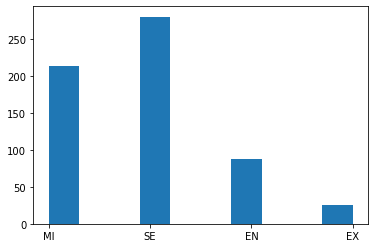

In [43]:
plt.hist(df["experience_level"],);